# Flood Forecasting
By: Sushant Bharadwaj Kagolanu

In [183]:
# Required libraries for basic EDA and the use of machine learning models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## Introduction
CIS 4526: Foundations of Machine Learning 
Project 2 - Using a Machine Learning Model

In this project, I will:
* Introduce and describe the dataset that I will be working with
* Conduct surface-level EDA to better understand the dataset and make it viable for training a machine learning model
* Select a machine learning model and setting its hyperparameters
* Conduct a forecast with the trained model and showcase its performance
* Explore alternatives to get improved predictions
* Conclude my findings from conducting a forecast with a machine learning model

For this project, I decided to work with the "Flood Prediction" dataset from Kaggle's available datasets. The dataset consists of specific environmentally-related features that will be used for flood detection. There are various global disasters that occur in many cities. Although disasters occur everywhere around the globe, its impact and rate of destruction depends on geographical factors. Floods have been extremely prevalant lately, and it is evident that such a horrific disaster has a significant impact on the infrastructure, environment, and the overall lifestyles of residents. Machine learning is required for this problem since it is important to be able to accurately depict and forecast upcoming floods to better prepare for such disasters and mitigate as much damage as possible. I am interested in working with this dataset as I would like to understand what it means at first-hand to be careful about making predictions that may potentially affect the safety of millions of people.

The Kaggle page of the "Flood Prediction" dataset can be accessed through this link: 
https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset

I will be working with the data I manually downloaded directly from the Kaggle page as it more consistent to work with static data versus getting the newest available version of the dataset from Kaggle.

In [184]:
# Loading the Flood Prediction dataset from local directory
datasetFlood = pd.read_csv("flood.csv")

## Describing the Dataset

In [185]:
# Get the basic information of the columns and rows of the dataset
datasetFlood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

The dataset consists of 21 collumns with the following variables considered:
1. MonsoonIntensity: Refers to the average intensity of monsoon seasons and the volume of rain within the area.
2. TopographyDrainage: Refers to the effiency of the drainage capacity of the region according to the topography.
3. RiverManagement: Refers to the effective management of nearby rivers.
4. Deforestation: Refers to the severity of any present deforestation in the region.
5. Urbanization: Refers to the stage of urbanization, involving construction practices and use of specific materials.
6. ClimateChange: Refers to the impact of climate change on the region.
7. DamsQuality: Refers to the availability and effectiveness of the dam within the area.
8. Siltation: Refers to the affected water depth by accumulated soil and sediments.
9. Agricultural Practices: Refers to the sustainable practices within agriculture.
10. Encroachments: Refers to the amount of intrusions or constructions within specific areas near the river.
11. IneffectiveDisasterPreparedness: Refers to the lack of emergency systems and simulations for disaster prevention within the region.
12. DrainageSystems: Refers to the maintenence and effectiveness of drainage systems within the area.
13. CoastalVulnerability: Refers to the safety of coastal areas.
14. Landslides: Refers to the severity of nearby landslides.
15. Watersheds: Refers to the size and amount of watersheds that deviate the water from main rivers.
16. DeterioratingInfrastructure: Refers to the available damages in infrastructure.
17. PopulationScore: Refers to the density of the population within the area.
18. WetlandLoss: Refers to the availability of wetlands.
19. InadequatePlanning: Refers to the lack of quality in urban planning.
20. PoliticalFactors: Refers to the notified corruption and lack of official support/investment in disaster prevention.
21. FloodProbability: Refers to the overall probability of flooding within the area during a particular time frame, such as within a year. This time frame is depicted depending on the amount of time the state of the region remained the same. In simpler terms, if a particular region or area did not change their drainage systems, planning, business, and overall environmental conditions for 3 months, the probability describes the number of overall detected dangers of flood alerts or actually occured floods within the 3 months. 

Each instance or row of data entry is not within a time series. Each instance refers to the particular state of a given region or area for which we are presenting the susceptibility of it to a potential flood. 

All of the variables are integers except the flood probability being a float, which is scaled from 0-1. The integer features do not use a specific metric or measurement to describe data. Rather, they are scaled in integers with specific ranges below:

In [186]:
# Printing the ranges of each predictor column 
for col in datasetFlood.columns[:-1]:
    print(f"{col} range: {datasetFlood[col].min()} - {datasetFlood[col].max()}")

MonsoonIntensity range: 0 - 16
TopographyDrainage range: 0 - 18
RiverManagement range: 0 - 16
Deforestation range: 0 - 17
Urbanization range: 0 - 17
ClimateChange range: 0 - 17
DamsQuality range: 0 - 16
Siltation range: 0 - 16
AgriculturalPractices range: 0 - 16
Encroachments range: 0 - 18
IneffectiveDisasterPreparedness range: 0 - 16
DrainageSystems range: 0 - 17
CoastalVulnerability range: 0 - 17
Landslides range: 0 - 16
Watersheds range: 0 - 16
DeterioratingInfrastructure range: 0 - 17
PopulationScore range: 0 - 19
WetlandLoss range: 0 - 22
InadequatePlanning range: 0 - 16
PoliticalFactors range: 0 - 16


The dataset comes with these scales describing each geographical and socio-economic feature. The lowest value 0 generally depicting the negative extreme and the largest value depicting the highest alignment with the intended variable. For example, 0 for monsoon intensity implies that there is little to no rain density during monsoon season compared to other data entries. Whereas 16 depicts one of the largest recorded monsoon activities within the area in conjuction to other data entries. Although the lack of rawness in the indicators may lead to certain inaccuracies with conclusions and correlations, the main purpose of this project is to be able to depict the probability of flooding accurately from a given set of unseen input data.

## Basic Check for Data Cleaning and Transformation

In [187]:
# Display a few rows from the top of the dataset
datasetFlood.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


From the presented info of the dataset earlier, there are no null entries within the entire dataset. Therefore, there is no requirement for any sort of deletion or imputation. Furthermore, all of the data is numerical, which does not require any sort of one-hot encoding to convert categorical data. Now, let us look at the basic statistics of the data to check for extreme outliers.

In [188]:
# Show basic statistical data of each data field
datasetFlood.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [189]:
# Create and display a table consisting of the deviation between the mean and median of each column except isFlood
differencesTable = pd.DataFrame({
    'Mean': datasetFlood.mean(),
    'Median': datasetFlood.median(),
    'Difference': datasetFlood.mean() - datasetFlood.median()
})

display(differencesTable)

,Mean,Median,Difference
MonsoonIntensity,4.99148,5.0,-0.00852
TopographyDrainage,4.98410,5.0,-0.01590
RiverManagement,5.01594,5.0,0.01594
Deforestation,5.00848,5.0,0.00848
Urbanization,4.98906,5.0,-0.01094
ClimateChange,4.98834,5.0,-0.01166
DamsQuality,5.01536,5.0,0.01536
Siltation,4.98860,5.0,-0.01140
AgriculturalPractices,5.00612,5.0,0.00612
Encroachments,5.00638,5.0,0.00638


After careful consideration and analysis, there are minimal differences between the mean and median for each variable. Furthermore, the medians all being similar indicates that the large dataset accounts for all relatively normal cases. However, extremes within the scales of each integer feature is a good sign of the relevance of the dataset to the problem because flooding is more probable in certain regions and countries due to specific extremes of certain variables. Let us look at the correlation between flood probability and the indicators of the dataset.

In [190]:
# Show the correlations of all the variables with respect to flood probability
(datasetFlood.corr(numeric_only=True))["FloodProbability"].sort_values(ascending=False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64

After reviewing the correlations of the indicators to the probability of flooding, there are several findings to highlight. All the correlations are positive, implying that all the negative posibilities of variable inferences are already accounted for. For example, instead of plotting the DisasterPreparedness of a region, the variable we have is the IneffectiveDisasterPreparedness. Moreover, most of the correlations are equal within the 0.23 - 0.21 range. These may be weak linear correlations. Considering all of the findings, this may be an indication that we can add non-linearity and interaction terms within our machine learning model. Overall, there are no terms that have no correlation to the probability. Therefore, we do not have to consider the removal of specific features for training. Let us now look at the box plots of the features and examine the outliers.

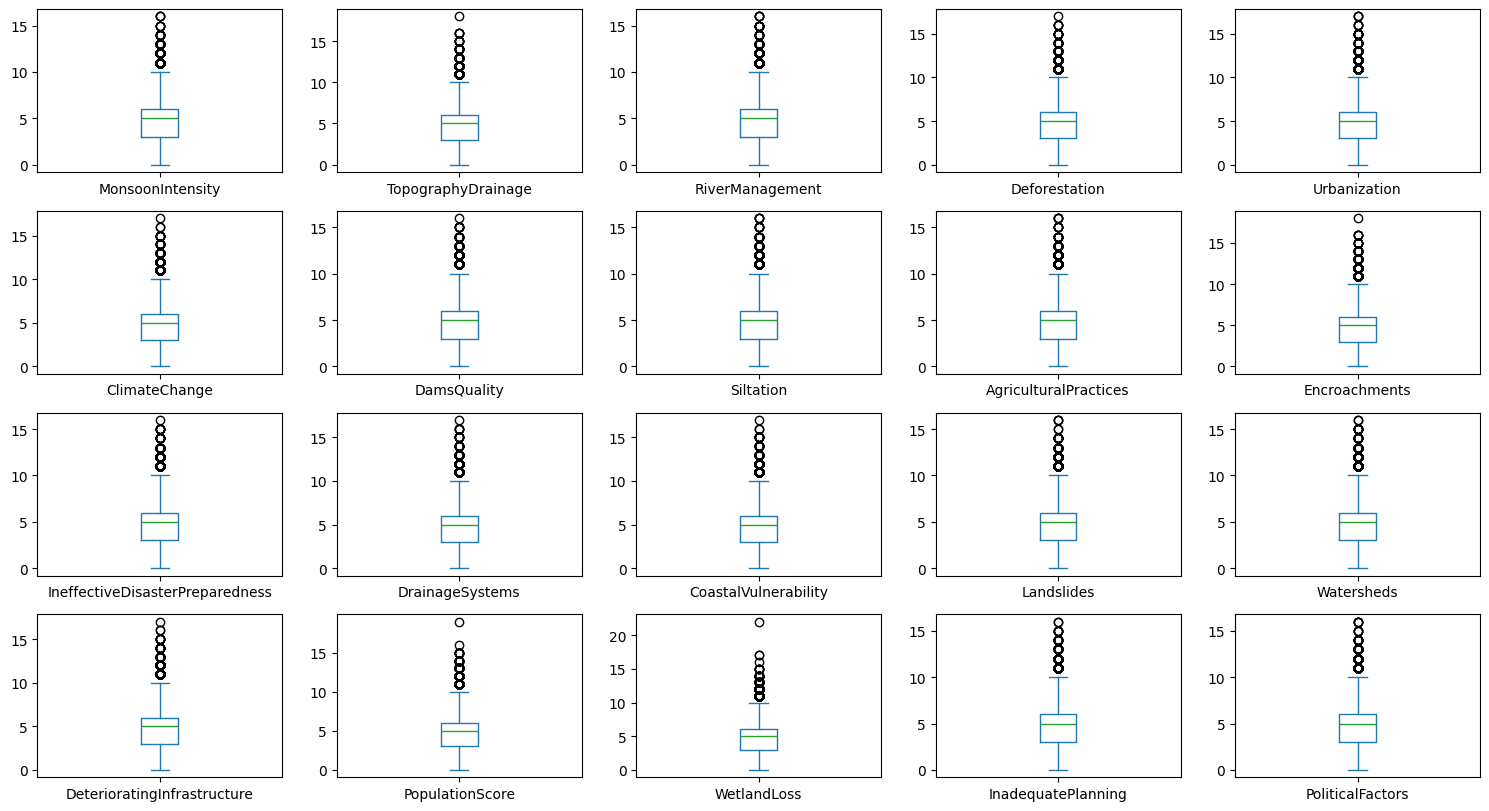

In [191]:
# Display all the indicators as box plots to observe outliers
datasetFlood.iloc[:, 0:20].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

There is a great number of outliers within all of the box plots. However, before we immediately start judging and deleting data entries, examine the location of the outliers. All of the outliers are located above the whiskers for each box plot. These outliers make sense within the context of our problem. Flood probabilities are highly different across countries and regions depending on extreme cases. Simply any extremity within any socio-economic or environmental factor may either lead to the cause or prevention of floods. Furthermore, floods are a result of some sort of extreme in real-life applications. Therefore, we must include all data entries for the machine learning model to understand that a part of the classification of floods may come from the availability of some form of extremity. 

Overall, it is safe to say that the data is already thoroughly cleaned and ready for training. Although we may move onto the machine learning model part of the project, it is important to emphasize the nature of prediction required for this problem. I will be taking the integer predictors into consideration and will need to output whether it indicates flooding or not. The raw probability of flooding is not enough since forecasts are required to specifically state the classified prediction rather than outputting the probability of a given event. In this case, we want to know if a place is going to flood or not. Therefore, the nature of the problem is implied to be a classification problem. In that case, we would need to transform the flood probability field into a boolean classification of whether it will flood or not. For now, we can keep it simple for the first model fit by classifying any probability greater than or equal to 50% as flooding.

In [192]:
# Make a new boolean column to classify flood probability 
datasetFlood['isFlood'] = datasetFlood['FloodProbability'] >= 0.5
datasetFlood.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,isFlood
0,3,8,6,6,4,4,6,2,3,2,...,7,4,2,3,4,3,2,6,0.450,False
1,8,4,5,7,7,9,1,5,5,4,...,2,6,2,1,1,9,1,3,0.475,False
2,3,10,4,1,7,5,4,7,4,9,...,4,4,8,6,1,8,3,6,0.515,True
3,4,4,2,7,3,4,1,4,6,4,...,2,6,6,8,8,6,6,10,0.520,True
4,3,7,5,2,5,8,5,2,7,5,...,6,5,3,3,4,4,3,4,0.475,False


In [193]:
# The number of declared floods
datasetFlood['isFlood'].value_counts()

isFlood
True     25513
False    24487
Name: count, dtype: int64

After making the new column for classification, there is no need to delete any features right now as there is no visible potential for data leakage. I am not going to pass the flood probability to the model and there are no particular data fields that have a direct inference to the occurence of a flood. For now, we will not delete the flood probability column as we may change the basis of the isFlood field later. Nonetheless, the number of true and false entries are fairly balanced, allowing for the model that we will be training to have a suitable amount of data to classify between the two. With that, we may move onto the training of a machine learning model.

## Training a Machine Learning Model
We want to classify between "will flood" and "will not flood" with the isFlood field. With that in mind, we require a classification model. On top of that, we are working with labeled data, which advocates for the need of a supervised learning model. Here are the considerations of possible supervised learning classification models:
* Logistic Regression: Simple and efficient to implement. However, this model may struggle with classifying data with predictors that do not have a linear relationship. In this case, we may have to trade off some bias for now to assume full linearity. But, we can always add some non-linearity within the input features to better fit the correlation of the data.
* Naive Bayes: A probabilistic classifer most suitable for this dataset that started with the probability of flooding. However, the "naive" assumption with Bayes' theorem regarding the independence of variables is simply unsuitable to use within this problem when such practical variables are quite dependent upon one another, such as DeterioratingInfrastructure and InadequatePlanning variables. This makes the model impactical to use for predicting real-life floods. 
* Decision Trees: Very simple and visual model used to interpret the given classes derieved from numerical data. However, this model is prone to overfitting, especially with a large dataset such as flood.csv with 50,000 data entries.
* Support Vector Machines (SVM): A powerful model that uses the hyperplane as a decision boundary. However, it is quite computationally heavy with large datasets, making it impractical for this application.
* Random Forest: A great ensemble method that reduces overfitting from trees. However, it loses interpretability for a dataset consideration regarding the disaster, floods. This is not desireable in general as there are other models with larger and simpler benefits. Even with boosting, it will exponentially skyrocket the need for computational power. 

After considering a broad range of classification models, logistic regression seems to be the most appropriate for the given binary classification problem. Furthermore, its simplicity allows us to allocate more time into fine tuning, such as feature engineering or tweaking hyperparameters. Moreover, we have a balanced dataset, which indicates that logistic regression should not have any problems being fit with the data. 

Another benefit of using logistic regression within our problem is its flexibility in the applications between batch learning and online learning. Depending on the credibility of the source of data, we may use online learning to continuously keep up with changing flooding indicators and correlations. This is especially important in flood predictions since we want the model to be up-to-date without facing the long downtime of re-training the model due to batch learning. For this project, we will stick to batch learning as there is no particular online source or stream of updated data to collect and train from. 

Let's initialize our logistic regression model!

In [194]:
# Instantiate the logistic regression model 
# Use a particular random state to allow for consistent results everytime you run the notebook
# Let penalty be set to None to not use any regularization techniques
classificationModelFloods = LogisticRegression(random_state = 1, penalty=None)

Now we prepare the dataset with relevant dependent variables and independent variables. For X value, we will include all of the available features except Flood Probability and IsFlood. IsFlood is the binary classification variable that we want to predict for, which makes it our only included column for our Y value. Flood probability solely exists to change the threshold of the classification of IsFlood later. Overall, since all of the other variables have equal correlation with flood probability, we will include all of them in X. We must then split our X and Y into training, testing, and validation data. There are various ways of splitting the dataset into these parts. The most common ratios are 80-10-10 and 60-20-20, in the order of data allocated for training, validation, and testing. I will be using the 60-20-20 ratio because I already have an abundant amount of data, comprising of 50,000 entries. This means that if I allocate most of the data for training, there is a high possibility of the model being overfit. Furthermore, even if the data is overfit with the 60-20-20 ratio, I may consider using a regularization method. Since I have a large amount of available data for the training, I do not require K-fold cross validation since I have enough data entries to spare for accurate deduction of the model's performance. For the data splitting, I will be using stratified data splitting to prevent the loss of balance in each data split. With that in mind, let us prepare the data for the model training and testing.

In [195]:
# Creating X and Y variables 
x = datasetFlood.drop(['FloodProbability', 'isFlood'], axis=1)
y = datasetFlood['isFlood']

# Split into training, testing, and validation
# Set the random state to allow for consistency within the project
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

Before we fit the data to the model, we must deduce the required metrics to depict the performance of the model. For this classification model, the cost function used is the log-loss function which can be directly imported from sklearn. Furthermore, I will use the confusion matrix to analyze the number of false negatives and false positives. In this problem, it is most important to avoid false negatives since we do not want to say that there will not be a flood when there is a flood incoming. That is the worst case senario as it does not allow the region to prepare for a disaster. For this case, we want to stress on the recall over precision. However, we will look into both recall and precision to better analyze the trade-off between these metrics. We can also display the overall accuracy of the model to get the general overview of the performance across all characteristics from the confusion matrix. Lastly, we can showcase the ROC curve to show how well the logistic regression model distinguishes between flood and no flood. Let us now fit the model.

In [196]:
# Train the logistic regression model with training data
classificationModelFloods.fit(x_train, y_train)

LogisticRegression(penalty=None, random_state=1)

Let's now review all of the suggested performance metrics of the model on training, validation, and test data. I will create a function to reduce redundancy and allow for interpretability in code. Here are the details of how I will be calculating all of the necessary metrics for this model:
1. I will require two essential variables: one for the predicted class, another for the prediction of the probability of each given class (True or False for isFlood).
2. The log loss is the cost function of logistic regression. It takes the observed Y values and the model's given probability predictions for each instance. The cost function evaluates the difference between observed values and predicted values. We want to minimize this as much as possible. The lower, the better the indicated performance.
3. The confusion matrix provides the number of instances declared to be true negative, true positive, false negative, and false positive. These metrics will be used to calculate recall, precision, and accuracy.
4. Recall: TP / (TP + FN) --- Considers false negatives, which is our focus for the problem as we want to avoid false negatives at all costs to prevent endangerment of citizens within flooding areas. We want this metric to be as high as possible.
5. Precision: TP / (TP + FP) --- Considers false positives, which is not our focus for the problem. However, we may need this metric to depict the tradeoff between precision and recall.
6. Accuracy: (TP + TN) / (TP + TN + FP + FN) --- Overall accuracy of true predictions over total predictions. We want this value to be high.
7. ROC curve and AUC are recommended metrics for classification. ROC curve retrieves the false positive rate (FP / (FP + TN)) and true positive rate (TP / (TP + FN)) with the class observations and probability predictions as input. These rates are calculated with consideration to each threshold, which specifies the decision boundary at specific given points. We will be strictly using the rates to plot it on a curve, and observe the shape of the graph. The AUC takes the rates and describes the area under the ROC curve, for which the higher the value, the better the performance. The maximum value it can reach is 1, indicating a perfect classifier. We want the classifier to be relatively good at predicting floods, but having it perfectly guess real-life floods in a world of continuous data is quite difficult. If we reach perfection in testing and validation, it may indicate some form of overfitting. Consider the ROC curves below from evidentlyai.com:

![alt text](rocCurve.png)

MLA citation of image: 
Evidently AI Team. “How to Explain the ROC AUC Score and ROC Curve?” Www.evidentlyai.com, 2024, www.evidentlyai.com/classification-metrics/explain-roc-curve.

We want to get close to a perfect model graph without representing overfitting.

Let us now create the function:

In [197]:
# A function that takes in the model, the dataset splits, and the name of operation
# The function will return the details of all of the metrics, including the ROC curve plot
def metricsModel(model, passedX, passedY):
    # We get the y values predicted by the model, which we will be comparing with the labeled data: passedY
    yPredict = model.predict(passedX)
    # We get the prediction of the probability of each class: isFlood True and False
    yPredictProb = model.predict_proba(passedX)

    # The cost function of logistic regression
    logLoss = log_loss(passedY, yPredictProb)

    # Attain True negatives, True positives, False positives, and False negatives to use for other metrics 
    confusionMatrix = confusion_matrix(passedY, yPredict)
    trueNeg, falsePos, falseNeg, truePos = confusionMatrix.ravel()

    # Calculate recall, precision, and accuracy
    recall = recall_score(passedY, yPredict)
    precision = precision_score(passedY, yPredict)
    accuracy = accuracy_score(passedY, yPredict)

    # Plot ROC curve and get numerical AUC value
    # We will not be using thresholds for any metrics, and we have specifically passed the probability predictions of True
    falsePosRate, truePosRate, thresholds = roc_curve(passedY, yPredictProb[:, 1])
    aucVal = auc(falsePosRate, truePosRate)

    # Output metrics
    print(f"Log Loss: {logLoss}")
    print(f"Confusion Matrix:\n{confusionMatrix}")
    print(f"True Negatives: {trueNeg}")
    print(f"True Positives: {truePos}")
    print(f"False Positives: {falsePos}")
    print(f"False Negatives: {falseNeg}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {aucVal}")
    plt.plot(falsePosRate, truePosRate)

Here are the metrics for training data:

Training:

Log Loss: 6.60329980267472e-05
Confusion Matrix:
[[14693     0]
 [    0 15307]]
True Negatives: 14693
True Positives: 15307
False Positives: 0
False Negatives: 0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
ROC AUC: 1.0


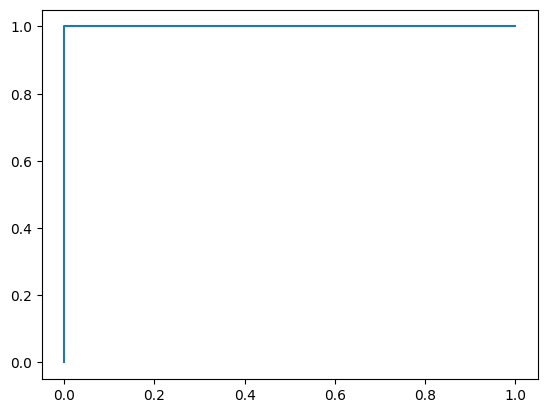

In [198]:
# Output metrics for training data
print("Training:\n")
metricsModel(classificationModelFloods, x_train, y_train)

Here are the metrics for validation data:

Validation:

Log Loss: 7.094175117206134e-05
Confusion Matrix:
[[4897    0]
 [   0 5103]]
True Negatives: 4897
True Positives: 5103
False Positives: 0
False Negatives: 0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
ROC AUC: 1.0


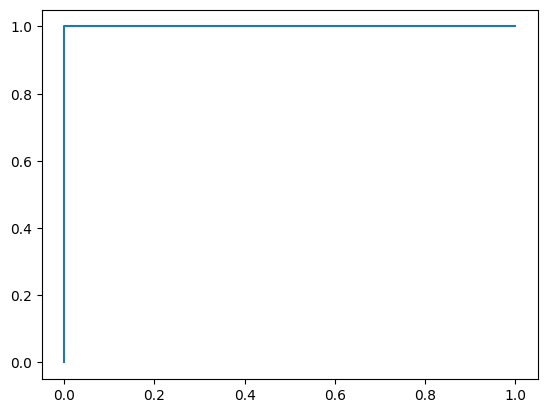

In [199]:
# Output metrics for validation data
print("Validation:\n")
metricsModel(classificationModelFloods, x_val, y_val)

Here are the metrics for test data:

Test:

Log Loss: 7.513902787496342e-05
Confusion Matrix:
[[4897    0]
 [   0 5103]]
True Negatives: 4897
True Positives: 5103
False Positives: 0
False Negatives: 0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0
ROC AUC: 1.0


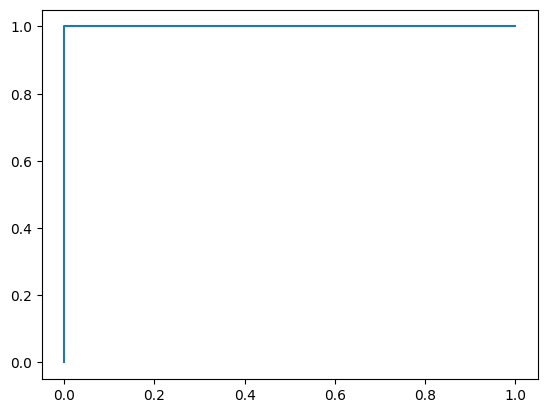

In [200]:
# Output metrics for testing data
print("Test:\n")
metricsModel(classificationModelFloods, x_test, y_test)

Due to the large dimensionality of the model's features, we will not be able to plot the decision boundary in accordance to all of the features in an interpretable way. However, considering all of the detailed metrics we retrieved for training, validation, and test data, it is evident that there is something suspicious going on with the model. For all of the data, the log loss function is nearly 0, there are no false negatives, no false positives, perfect recall, perfect precision, perfect accuracy, perfect ROC AUC, and all of the plotted curves indicate a perfect model. This is highly unrealistic for the model to perfectly predict the test data for real-life applications, such as flood forecasting. There are possible reasons for these findings:
* This is a sign of overfitting the logistic regression model
* This can be a result of working with abundant amount of data, leading to a perfect classifier
* There is a problem with the initial assumption of setting the classification threshold of isFlood at 50%.

## Improving Existing Machine Learning Model
We can confidently say that this is not an indication of genuine perfection from the model as it is unrealistic for a classifier to perfectly predict floods in a continuous world. Furthermore, the lack of distinction between the metrics of each data split implies that it directly memorized and mapped the values into its trained dataset, signifying overfitting. 

On the other hand, we must also consider the logic of creating a classification column that sets the threshold from probabilities at 50%. The implication of an instance's isFlood variable to True has minimal contribution within the context of our problem. If it is True, it only implies that the predicted porbability of flooding by the model is above 50% threshold. We do not have real data of whether the probability actually resulted in a flood or not. This implies that we can only set the classification for a specific probability threshold that covers the most minimal amount of false negatives. We will go more into the improvements for practical applications later in the conclusion. In simplicity, our goal of creating isFlood column is to forcefully work with a classification dataset to better fit our need for the problem, being that we are only interested in classifying between floods and no floods rather than predicting the probability. We will stick to the dataset and treat the problem as a need for classification. With this in mind, we must be careful about data leakage.

Another potential explanation for the performance of the model is the possible simplicity of the dataset. Given all of the X features, it might give the model too much information to accurately deduce the classification of the model. We may have to consider feature engineering to make the model more complex.

Taking the reasons into consideration, let us consider a few possible considerations and methods of reducing the overfitting problem and improving the overall practicality of our model:
* Although there is an abundant amount of training data with 30,000 entries, it is generally good to have a large amount of training data since it helps reduce overfitting within the context of our dataset. As reviewed earlier, our dataset is quite balanced. Furthermore, we used stratified data splitting, which keeps the split data relatively balanced. A large amount of diverse training data prevents the model from memorizing patterns. However, keeping 40% of the dataset for validation and testing is large enough to accurately measure the effectiveness of the model's predictions on unseen data. We will not be changing the split thresholds. 
* We can reconstruct the way we form isFlood to make it more practical for our problem solving goals in real world applications. Instead of setting a threshold, let us simulate each instance's flood probability and let it automatically set isFlood using a random function considering the probability of attaining a class. With this, it will make the dataset more diverse in terms of patterns, making the model more complex. 
* We may also consider feature engineering and reduce the number of features. However, they are all equally correlated to the flood probability, which means we cannot reduce the dimensionality of the dataset too much without losing required data. We may also experiment by adding interaction terms or non-linearity to increase the complexity of the model while potentially reducing the dimensionality. For now, the dataset findings we have retrieved do not imply any non-linear relationship. Furthermore, the given correlations are quite equal in conjuction to flood probability, reducing the need for interaction terms. Moreover, there is no particular data leakage for specific features. Depending on the status of overfitting after selecting ideal hyperparameters, we might employ more feature engineering. For now, using the new isFlood column and determining the new performance of the model should suffice. 
* I will be using Gridsearchcv for regularization and tuning hyperparameters. In that case, we will strictly work with training and test data for the improved version of the model since we just want a quick glance at the performance of the model. The Gridsearchcv function already conducts K-means cross validation, allowing us to focus on only the splits of training and test data. In that case, we will use 80-20 ratio for training and testing respectively and set the cross validation parameter to 3 folds.
* Lastly, we can adjust and experiment with the best suited hyperparameters for the model. We can set a penalty to the model by using regularization. Between L1 norm (LASSO regression) and L2 norm (ridge regression), it is probably recommended to use L2 norm regularization because we have an equally correlated dataset for which we do not want to set the coefficient of any feature to 0, hence leading to the dropping of features from the prediction model. Furthermore, we can set other hyperparameters, such as the toleration, C (inverse of regularization strength), solver, etc. We will be using gridsearchcv to iterate through almost all possible combinations of hyperparameters to select the best performing model. Gridsearchcv accounts for overfitting within the method, making it suitable for improvements to the model.

Let us now make these improvements and later analyze our final findings!

I will be overwriting the isFlood column with a different approach. Instead of setting a threshold directly from flood probability, I will use a random method that outputs a class depending on the simulated given probability. With this, I am essentially simulating flood predictions for each region instance. For example, with a flood probability of 40%, the instance has a 40% chance of being True. However, I am not necessarily setting it to a particular class by comparing it to a threshold. Rather, I will use a random weighted function and it may set the instance to any class depending on the simulation. This way, we are realistically setting the isFlood classifications. This will make the dataset more complex for the model to learn from.

In [201]:
import random

# Set a specific seed for consistency within the project
random.seed(1)

# Simulate flood probabilities and set isFlood with weighted randomness
isFloodClass = [True, False]
datasetFlood['isFlood'] = datasetFlood['FloodProbability'].apply(
lambda probFlood: random.choices(population=isFloodClass, weights=[probFlood, 1 - probFlood], k=1)[0]
)

# Display the new isFlood entries
datasetFlood.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,isFlood
0,3,8,6,6,4,4,6,2,3,2,...,7,4,2,3,4,3,2,6,0.450,True
1,8,4,5,7,7,9,1,5,5,4,...,2,6,2,1,1,9,1,3,0.475,False
2,3,10,4,1,7,5,4,7,4,9,...,4,4,8,6,1,8,3,6,0.515,False
3,4,4,2,7,3,4,1,4,6,4,...,2,6,6,8,8,6,6,10,0.520,True
4,3,7,5,2,5,8,5,2,7,5,...,6,5,3,3,4,4,3,4,0.475,False


Let us now use Gridsearchcv to pick the ideal hyperparameters of our logistic regression model using training and testing data. 

I will be following the steps on using gridsearchcv from a YouTube video with the MLA citation:
Kunaal Naik | Data Science Masterminds. “Sklearn Logistic Regression Hyperparameter Optimization.” YouTube, 25 Mar. 2020, www.youtube.com/watch?v=pooXM9mM7FU. Accessed 4 May 2025.

Using the gridsearchcv, I will have the best iteration of the logistic regression model and use that to check the new performance of the model over the new isFlood data.
I will be iterating through various available regularization techniques, solvers for the best optimization algorithm to use for minimal log loss, C value which describes the regularization strength (lower the C, the higher the regularization), and max_iter for the maximum number of allowed iterations for checking each optimization algorithm for solvers. Let us now find the best hyperparameters.

In [202]:
from sklearn.model_selection import GridSearchCV

# Creating X and Y variables 
x = datasetFlood.drop(['FloodProbability', 'isFlood'], axis=1)
y = datasetFlood['isFlood']

# Split into training and testing (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

# Instantiate the logistic regression model
classificationModelFloods = LogisticRegression(random_state=1)

# Create the grid of hyperparameters that we want the gridsearchcv to iterate through
param_grid = [
    { 'penalty': ['l2'], # We use l2 to prevent making coefficients of any features 0
    'solver': ['liblinear', 'sag', 'saga'], # Recommended solvers for large dataset
    'C': np.logspace(-4, 4, 20), # Provided C params from video
    'max_iter': [100, 1000, 2500, 5000] # Provided max_iter params from video
    }
]

# Find the best hyperparameters for the model with cross validation of 3 folds
print("Running GridSearchCV...")
clf = GridSearchCV(classificationModelFloods, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
clf.fit(x_train, y_train)
print("GridSearchCV complete.\n")

# Output the model hyperparameters
print(f"Best model hyperparameters: {clf.best_params_}")

Running GridSearchCV...
Fitting 3 folds for each of 240 candidates, totalling 720 fits
GridSearchCV complete.

Best model hyperparameters: {'C': np.float64(0.0001), 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


Let us now use the new and improved model and check its performance on training and test data with the newly created isFlood Y variable as our target prediction. If it remains overfitted, we can then delve into different K values for K-means cross validation and feature engineering of removing, adding interaction terms, or adding non-linearity with regards to the features we are working with. 

Training:
Log Loss: 0.6866247074209129
Confusion Matrix:
[[10895  9081]
 [ 9029 10995]]
True Negatives: 10895
True Positives: 10995
False Positives: 9081
False Negatives: 9029
Recall: 0.5490910906911706
Precision: 0.5476688583383144
Accuracy: 0.54725
ROC AUC: 0.5649663685515707


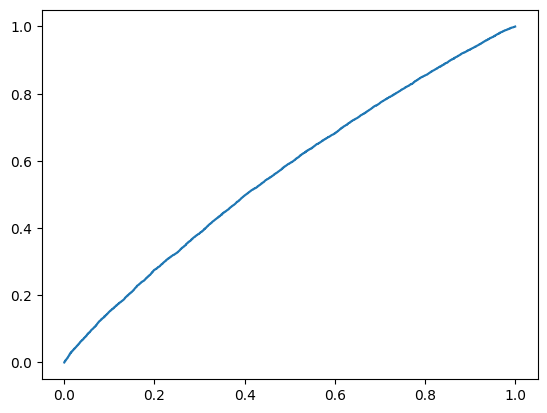

In [203]:
# Metrics for training data
print("Training:")
metricsModel(clf.best_estimator_, x_train, y_train)

Testing:
Log Loss: 0.6875046284214527
Confusion Matrix:
[[2700 2294]
 [2344 2662]]
True Negatives: 2700
True Positives: 2662
False Positives: 2294
False Negatives: 2344
Recall: 0.5317618857371155
Precision: 0.5371267150928168
Accuracy: 0.5362
ROC AUC: 0.5567138016678744


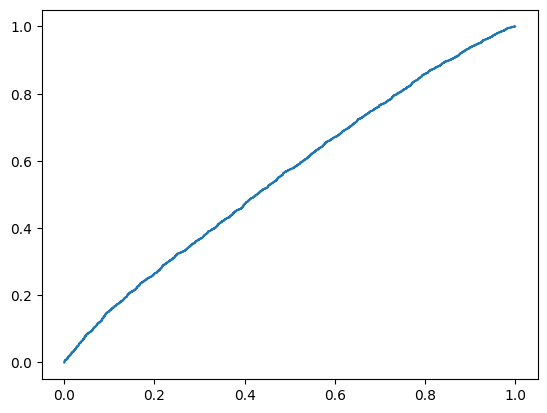

In [204]:
# Metrics for test data
print("Testing:")
metricsModel(clf.best_estimator_, x_test, y_test)

This is an interesting finding. The data is no longer near perfect. In fact, the performance is quite mediocre in terms of both test and training data. The accuracies are around 50% and the log loss is beyond 0.5, making it no better than a random classifier. This may be indicated by the nature of predicting from simulated values of probabilities for classification. 

We will adopt another method to classify instead to better understand the prediction. We will instead use a basic linear model with minimal tuning to predict flood probabilities. If it can accurately predict the probabilities with minimal error, we can essentially customize our own sigmoid function to convert probabilities into strict classes, leading us to be able to control the focus onto recall rather than precision. Let us now quickly use a linear regression model and see its performance from the basic linear regression performance metrics: MAE, MSE, RMSE, and R2 score.

Performance on test data: 
MAE: 3.4816038940732594e-16
MSE: 1.9241457628867556e-31
RMSE: 4.386508592134245e-16
R-squared: 1.0


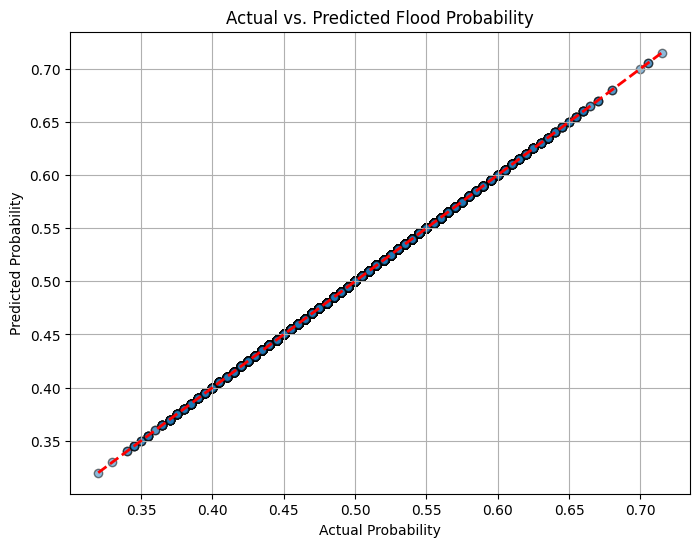

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create X and Y variables
x = datasetFlood.drop(['FloodProbability', 'isFlood'], axis=1)
y = datasetFlood['FloodProbability']

# Split the data into training and test data (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Instantiate the model and fit the model
regressionModelFloods = LinearRegression()
regressionModelFloods.fit(x_train, y_train)

# Evaluate the performance of the linear regression model
yPred = regressionModelFloods.predict(x_test)
print("Performance on test data: ")
print(f"MAE: {mean_absolute_error(y_test, yPred)}")
print(f"MSE: {mean_squared_error(y_test, yPred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, yPred))}")
print(f"R-squared: {r2_score(y_test, yPred)}")

# Plot graph of observed vs predicted using recommended plot settings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yPred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Flood Probability')
plt.xlabel('Actual Probability')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.show()

With no tweaking from the linear regression model, it was able to provide similar results from the initial logistic regression training. It has perfect MAE, MSE, RMSE, and R2 score. It is able to perfectly predict the flood probabilities. This means that the dataset has a very easy pattern that the models were immediately able to figure out. This is suspicious. Before we perform feature engineering, we must check if the dataset was synthesized, essentially the dataset being fake. Let us use a basic pattern such as the sum of the predictors, and check its correlation with the flood probability.

In [206]:
# Create total sum that sums the predictors
datasetFlood['TotalSum'] = datasetFlood[x_test.columns].sum(axis=1)

# Show the correlation between the total score and the flood probability
datasetFlood[['TotalSum', 'FloodProbability']].corr()

,TotalSum,FloodProbability
TotalSum,1.0,1.0
FloodProbability,1.0,1.0


It is confirmed that this is a synthesized dataset and that we do not need to proceed any further with the machine learning model analysis.

## Conclusion

After the entire process of finding the most suitable machine learning model and making several improvements, I was able to deduce that the dataset is in fact synthesized by the creator without my knowledge. This is a successful project as I was able to determine accurate classifications, reduce data leakage, optimize hyperparameters, showcase metrics, interpret information through graphs, and explore the forecasting element of floods. Working with predictions and considering its significance on continuous data in real-world applications allowed me to better understand the importance of relevant data and models for predicting something as important as disasters, which may affect the well-being of stakeholders using this model. I was able to conclude that the use of logistic regression with hyperparameters {'C': np.float64(0.0001), 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'} provided the best result, highlighting the linear relationship of independent and dependent variables. Furthermore, the use of simulated probabilities to create classifications showcased the difficulty of classifying real-world data, evident from the prediction of test data metrics, such as the log loss of 0.69, recall of 0.53, and precision of 0.54. Although working with synthesized data retrieved unusual results and provided no realism within the context of real-life floods, I was still able to determine that it was synthesized through testing, optimizing, and analyzing as a machine learning analyst. As a further possibility of improvement for real-world applications, I will use real datasets regarding floods, use the most optimized regression model to predict probabilities from unseen data, and classify it using a sigmoid function in such as way where we optimize recall over precision. Overall, I was able to successfully use a machine learning model in a problem that required ML, and made improvements along the project. The only limitation of the insight stemmed from the synthesized dataset, which was out of my control as it was not stated on the Kaggle page. Nonetheless, I was still able to produce accurate results and follow the right procedures.